In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
#pd.set_option('max_columns', 25)
#url = 'https://raw.githubusercontent.com/plotly/datasets/master/telco-customer-churn-by-IBM.csv'
#df = pd.read_csv(url)

In [5]:
df.to_csv('data/customer-churn.csv', index = False)

In [10]:
pd.read_excel('data/Telco_customer_churn_location.xlsx').to_csv('data/customer-locations.csv', index = False)

In [10]:
#locs = pd.read_csv('data/customer-locations.csv')
custs = pd.read_csv('data/customer-churn.csv')

In [21]:
full_cust = pd.merge(custs, locs, how = 'left')

In [23]:
full_cust.to_csv('data/full_cust_info.csv', index = False)

In [57]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [58]:
sc = df.query('Churn == "No"')

In [59]:
sc.infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5174 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5174 non-null   object 
 1   gender            5174 non-null   object 
 2   SeniorCitizen     5174 non-null   int64  
 3   Partner           5174 non-null   object 
 4   Dependents        5174 non-null   object 
 5   tenure            5174 non-null   int64  
 6   PhoneService      5174 non-null   object 
 7   MultipleLines     5174 non-null   object 
 8   InternetService   5174 non-null   object 
 9   OnlineSecurity    5174 non-null   object 
 10  OnlineBackup      5174 non-null   object 
 11  DeviceProtection  5174 non-null   object 
 12  TechSupport       5174 non-null   object 
 13  StreamingTV       5174 non-null   object 
 14  StreamingMovies   5174 non-null   object 
 15  Contract          5174 non-null   object 
 16  PaperlessBilling  5174 non-null   object 


In [60]:
sc.TotalCharges.value_counts().reset_index()['index'][0]

' '

In [61]:
sc.query('TotalCharges == " "')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [62]:
sc.OnlineSecurity.value_counts()

No                     2037
Yes                    1724
No internet service    1413
Name: OnlineSecurity, dtype: int64

In [63]:
sc['TotalCharges'] = sc.TotalCharges.replace(' ', 0).astype(float)

C:\Users\andre\AppData\Local\Temp\ipykernel_5916\2515338294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc['TotalCharges'] = sc.TotalCharges.replace(' ', 0).astype(float)


In [64]:
sc = sc.infer_objects()

In [65]:
sc['tenureYears'] = sc.tenure/12

In [66]:
sc.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,tenureYears
count,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000
mean,0.128721,37.569965,61.265124,2549.911442,3.130830
std,0.334923,24.113777,31.092648,2329.954215,2.009481
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,15.000000,25.100000,572.900000,1.250000
50%,0.000000,38.000000,64.425000,1679.525000,3.166667
75%,0.000000,61.000000,88.400000,4262.850000,5.083333
max,1.000000,72.000000,118.750000,8672.450000,6.000000


In [67]:
sc.query('PaperlessBilling == "Yes"').shape[0]

2771

In [68]:
sc[['Partner','Dependents']].groupby(['Partner','Dependents']).size().to_frame().reset_index()

,Partner,Dependents,0
0,No,No,2157
1,No,Yes,284
2,Yes,No,1233
3,Yes,Yes,1500


In [69]:
sc['SeniorCitizen'] = sc['SeniorCitizen'].replace(1,'Yes').replace(0,'No')

In [70]:
sc[['SeniorCitizen']].groupby('SeniorCitizen').size().to_frame().reset_index()

,SeniorCitizen,0
0,No,4508
1,Yes,666


In [8]:
df = pd.read_csv('data/customer-churn.csv')

In [10]:
cd = df.query('Churn == "Yes"')
sc = df.query('Churn == "No"')

In [11]:
cd

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [16]:
fig = px.bar(df, x="InternetService", color="Churn")

fig.update_layout(barmode='relative')
fig.show()

In [2]:
custs = pd.read_csv('data/customer-churn.csv')
custs

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#custs['Partner'] = custs['Partner'].map({'yes': 1, 'no': 0})

In [3]:
def yes_no(value):
    global custs
    custs[value] = custs[value].map({'Yes': 1, 'No': 0})


 6   OnlineSecurity                            5517 non-null   float64
 7   OnlineBackup                              5517 non-null   float64
 8   DeviceProtection                          5517 non-null   float64
 9   TechSupport                               5517 non-null   float64
 10  StreamingTV                               5517 non-null   float64
 11  StreamingMovies                           5517 non-null   float64

In [4]:
yes_no('Dependents')
yes_no('Dependents')
yes_no('Partner')
yes_no('PhoneService')
#yes_no('OnlineSecurity')
#yes_no('DeviceProtection')
#yes_no('TechSupport')
#yes_no('StreamingTV')
#yes_no('StreamingMovies')
yes_no('PaperlessBilling')
yes_no('Churn')
#yes_no('OnlineBackup')
def dummy_creation(col):
    global custs
    dummy = pd.get_dummies(custs[col], prefix = str(col + '_'))

    custs = pd.concat([custs, dummy], axis = 1)

    custs.drop(columns = [col], inplace = True)

dummy_creation('gender')
dummy_creation('MultipleLines')
dummy_creation('InternetService')
dummy_creation('Contract')
dummy_creation('PaymentMethod')
dummy_creation('OnlineSecurity')
dummy_creation('DeviceProtection')
dummy_creation('TechSupport')
dummy_creation('StreamingTV')
dummy_creation('StreamingMovies')
dummy_creation('OnlineBackup')

In [8]:
custs

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport__Yes,StreamingTV__No,StreamingTV__No internet service,StreamingTV__Yes,StreamingMovies__No,StreamingMovies__No internet service,StreamingMovies__Yes,OnlineBackup__No,OnlineBackup__No internet service,OnlineBackup__Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,0,0,1
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,...,0,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,1,0,0,1,0,0,1,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,84.80,1990.5,0,...,1,0,0,1,0,0,1,1,0,0
7039,2234-XADUH,0,1,1,72,1,1,103.20,7362.9,0,...,0,0,0,1,0,0,1,0,0,1
7040,4801-JZAZL,0,1,1,11,0,1,29.60,346.45,0,...,0,1,0,0,1,0,0,1,0,0
7041,8361-LTMKD,1,1,0,4,1,1,74.40,306.6,1,...,0,1,0,0,1,0,0,1,0,0


In [73]:
custs['TotalCharges'] = custs['TotalCharges'].replace(' ',0).astype(float)
cols_to_norm = ['MonthlyCharges', 'TotalCharges', 'tenure']
custs[cols_to_norm] = custs[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [75]:
custs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   customerID                                7043 non-null   object 
 1   SeniorCitizen                             7043 non-null   int64  
 2   Partner                                   7043 non-null   int64  
 3   Dependents                                7043 non-null   int64  
 4   tenure                                    7043 non-null   float64
 5   PhoneService                              7043 non-null   int64  
 6   PaperlessBilling                          7043 non-null   int64  
 7   MonthlyCharges                            7043 non-null   float64
 8   TotalCharges                              7043 non-null   float64
 9   Churn                                     7043 non-null   int64  
 10  gender__Female                      

In [76]:
custs

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender__Female,gender__Male,MultipleLines__No,MultipleLines__No phone service,MultipleLines__Yes,InternetService__DSL,InternetService__Fiber optic,InternetService__No,Contract__Month-to-month,Contract__One year,Contract__Two year,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check,OnlineSecurity__No,OnlineSecurity__No internet service,OnlineSecurity__Yes,DeviceProtection__No,DeviceProtection__No internet service,DeviceProtection__Yes,TechSupport__No,TechSupport__No internet service,TechSupport__Yes,StreamingTV__No,StreamingTV__No internet service,StreamingTV__Yes,StreamingMovies__No,StreamingMovies__No internet service,StreamingMovies__Yes,OnlineBackup__No,OnlineBackup__No internet service,OnlineBackup__Yes
0,7590-VHVEG,0,1,0,0.013889,0,1,0.115423,0.003437,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
1,5575-GNVDE,0,0,0,0.472222,1,0,0.385075,0.217564,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,0,0,0.027778,1,1,0.354229,0.012453,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,7795-CFOCW,0,0,0,0.625000,0,0,0.239303,0.211951,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0
4,9237-HQITU,0,0,0,0.027778,1,1,0.521891,0.017462,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,0.333333,1,1,0.662189,0.229194,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0
7039,2234-XADUH,0,1,1,1.000000,1,1,0.845274,0.847792,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1
7040,4801-JZAZL,0,1,1,0.152778,0,1,0.112935,0.039892,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
7041,8361-LTMKD,1,1,0,0.055556,1,1,0.558706,0.035303,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [77]:
custs.drop(columns = ['customerID']).to_csv('data/model_csv.csv', index = False)

In [78]:
df_model = custs.drop(columns = ['customerID'])

In [79]:
df_model

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender__Female,gender__Male,MultipleLines__No,MultipleLines__No phone service,MultipleLines__Yes,InternetService__DSL,InternetService__Fiber optic,InternetService__No,Contract__Month-to-month,Contract__One year,Contract__Two year,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check,OnlineSecurity__No,OnlineSecurity__No internet service,OnlineSecurity__Yes,DeviceProtection__No,DeviceProtection__No internet service,DeviceProtection__Yes,TechSupport__No,TechSupport__No internet service,TechSupport__Yes,StreamingTV__No,StreamingTV__No internet service,StreamingTV__Yes,StreamingMovies__No,StreamingMovies__No internet service,StreamingMovies__Yes,OnlineBackup__No,OnlineBackup__No internet service,OnlineBackup__Yes
0,0,1,0,0.013889,0,1,0.115423,0.003437,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
1,0,0,0,0.472222,1,0,0.385075,0.217564,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
2,0,0,0,0.027778,1,1,0.354229,0.012453,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,0,0,0,0.625000,0,0,0.239303,0.211951,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0
4,0,0,0,0.027778,1,1,0.521891,0.017462,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0.333333,1,1,0.662189,0.229194,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0
7039,0,1,1,1.000000,1,1,0.845274,0.847792,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1
7040,0,1,1,0.152778,0,1,0.112935,0.039892,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
7041,1,1,0,0.055556,1,1,0.558706,0.035303,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#pip install scikit-plot (optional)
!pip install scikit-plot
import scikitplot as skplt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#for validating your classification model
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, cross_val_predict
from patsy import dmatrices
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo
print(plotly.__version__)

5.11.0


In [81]:
y = df_model['Churn']
X = df_model.drop(columns=['Churn'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [83]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender__Female,gender__Male,MultipleLines__No,MultipleLines__No phone service,MultipleLines__Yes,InternetService__DSL,InternetService__Fiber optic,InternetService__No,Contract__Month-to-month,Contract__One year,Contract__Two year,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check,OnlineSecurity__No,OnlineSecurity__No internet service,OnlineSecurity__Yes,DeviceProtection__No,DeviceProtection__No internet service,DeviceProtection__Yes,TechSupport__No,TechSupport__No internet service,TechSupport__Yes,StreamingTV__No,StreamingTV__No internet service,StreamingTV__Yes,StreamingMovies__No,StreamingMovies__No internet service,StreamingMovies__Yes,OnlineBackup__No,OnlineBackup__No internet service,OnlineBackup__Yes
3580,0,0,1,0.125000,1,1,0.543781,0.075005,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0
2364,0,1,0,0.194444,1,1,0.640796,0.136445,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
6813,0,1,0,0.888889,0,0,0.294527,0.362415,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0
789,0,0,0,1.000000,1,0,0.511443,0.565154,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1
561,0,1,0,0.041667,1,1,0.053234,0.010254,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,1,0,0.208333,1,1,0.847761,0.177298,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0
3264,0,0,1,0.138889,1,1,0.724876,0.111039,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0
1653,0,1,0,0.805556,1,0,0.024876,0.136555,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2607,1,0,0,0.013889,1,1,0.512438,0.008031,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [84]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

print (metrics.accuracy_score(y_test, lr.predict(X_test)))
print ("--------------------------------------------------------")
print (metrics.confusion_matrix(y_test, lr.predict(X_test))) 
print ("--------------------------------------------------------")
print (metrics.classification_report(y_test, lr.predict(X_test)))
print ("--------------------------------------------------------")
print (metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.8026502602934217
--------------------------------------------------------
[[1398  162]
 [ 255  298]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1560
           1       0.65      0.54      0.59       553

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113

--------------------------------------------------------
0.7175163444150786


In [85]:
rf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

print(metrics.accuracy_score(y_test, rf.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, rf.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, rf.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, rf.predict(X_test)))

0.7823000473260767
--------------------------------------------------------
[[1395  165]
 [ 295  258]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1560
           1       0.61      0.47      0.53       553

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113

--------------------------------------------------------
0.6803884406732508


In [65]:
custs1 = pd.read_csv('data/customer-churn.csv')
custs1.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

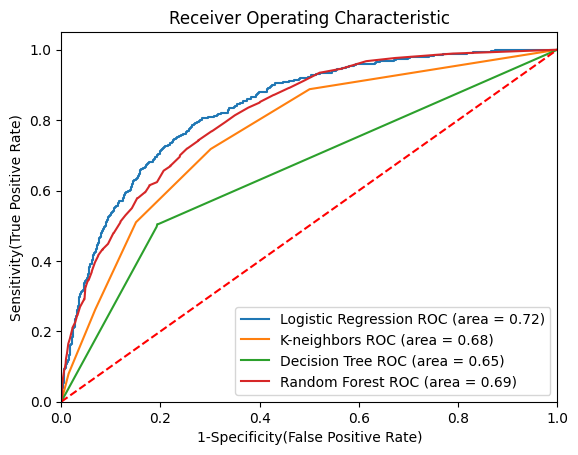

In [87]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
classifiers = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(max_iter = 500),
},
{
    'label': 'K-neighbors',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=50),
}
]

# Below for loop iterates through your models list
for m in classifiers:
    classifier = m['model'] # select the model
    classifier.fit(X_train, y_train) # train the model
       
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, classifier.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test, classifier.predict(X_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [88]:
!pip install imbalanced-learn --user

     -------------------------------------- 226.0/226.0 kB 6.7 MB/s eta 0:00:00


In [91]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(os_data_y)
os_data_y.columns = ['y']

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of customer results in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of churns",len(os_data_y[os_data_y['y']==1]))
print("Proportion of any other result in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of swing and miss in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  7228
Number of customer results in oversampled data 3614
Number of churns 3614
Proportion of any other result in oversampled data is  0.5
Proportion of swing and miss in oversampled data is  0.5


In [92]:
print(os_data_X.shape, os_data_y.shape)

(7228, 41) (7228, 1)


<AxesSubplot: xlabel='y'>

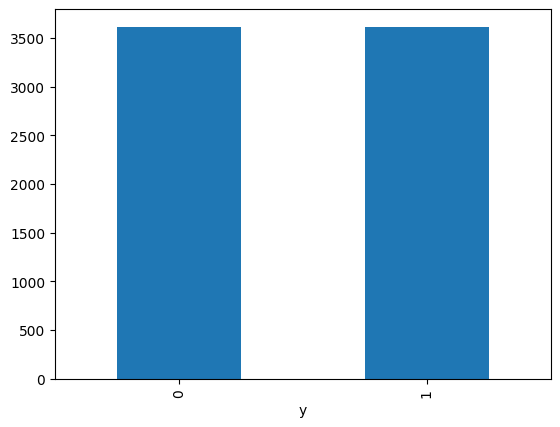

In [93]:
os_data_y.groupby('y').size().plot.bar()

In [94]:
X=os_data_X
y=os_data_y

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7228, 41) (7228, 1)
(5059, 41) (5059, 1) (2169, 41) (2169, 1)


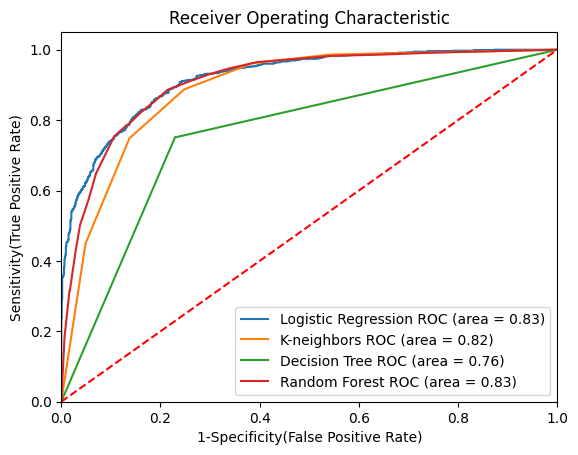

In [96]:
#https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python

plt.figure()

# Add the models to the list that you want to view on the ROC plot
classifiers = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(max_iter = 500),
},
{
    'label': 'K-neighbors',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=20),
}
]

# Below for loop iterates through your models list
for m in classifiers:
    classifier = m['model'] # select the model
    classifier.fit(X_train, y_train) # train the model
       
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, classifier.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test, classifier.predict(X_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [98]:
for m in classifiers:
    classifier = m['model'] # select the model
    classifier.fit(X_train, y_train.values.ravel()) # train the model
    y_score = classifier.predict(X_test)
    print(m['label'])
    print(accuracy_score(y_test, y_score))
    print(confusion_matrix(y_test, y_score))
    print(classification_report(y_test, y_score))
    print("auc:", metrics.roc_auc_score(y_test, y_score))
    print("recall score:", metrics.recall_score(y_test, y_score))    
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Logistic Regression
0.8303365606270171
[[900 185]
 [183 901]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1085
           1       0.83      0.83      0.83      1084

    accuracy                           0.83      2169
   macro avg       0.83      0.83      0.83      2169
weighted avg       0.83      0.83      0.83      2169

auc: 0.8303369496828609
recall score: 0.8311808118081181
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
K-neighbors
0.8197325956662056
[[816 269]
 [122 962]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1085
           1       0.78      0.89      0.83      1084

    accuracy                           0.82      2169
   macro avg       0.83      0.82      0.82      2169
weighted avg       0.83      0.82      0.82      2169

auc: 0.8197638036288196
recall score: 0.8874538745387454
++++++++++++++++++++++++++++++++++++++++++

In [99]:
rfc = RandomForestClassifier(n_estimators=500)

rfc.fit(X_train, y_train)

#Model evaluation with split valdation
print( metrics.accuracy_score(y_test, rfc.predict(X_test)))
print( "--------------------------------------------------------")
print( metrics.confusion_matrix(y_test, rfc.predict(X_test)) )
print( "--------------------------------------------------------")
print( metrics.classification_report(y_test, rfc.predict(X_test)))
print( "--------------------------------------------------------")
print( metrics.roc_auc_score(y_test, rfc.predict(X_test)))

0.8377132319041033
--------------------------------------------------------
[[895 190]
 [162 922]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1085
           1       0.83      0.85      0.84      1084

    accuracy                           0.84      2169
   macro avg       0.84      0.84      0.84      2169
weighted avg       0.84      0.84      0.84      2169

--------------------------------------------------------
0.8377191490808917


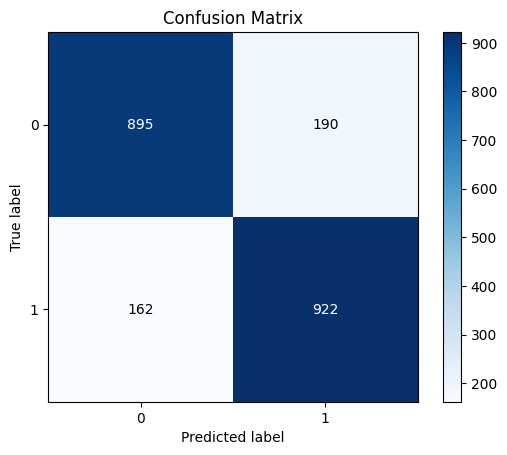

In [100]:
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=rfc.predict(X_test))
plt.show()

In [142]:
prediction = rfc.predict_proba(X_test)

In [143]:
probs = pd.DataFrame(prediction)

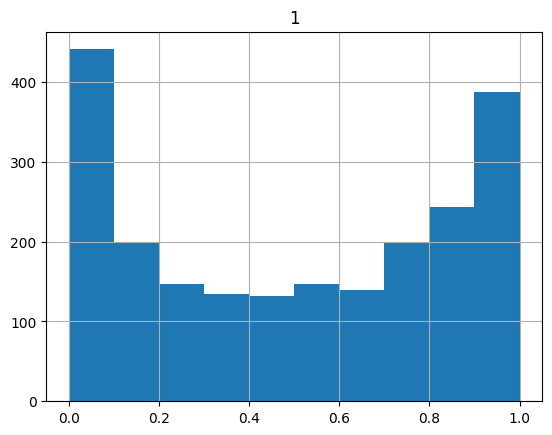

In [144]:
probs.hist(column=1);

In [117]:
len(probs)

7228

In [123]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

print (metrics.accuracy_score(y_test, lr.predict(X_test)))
print ("--------------------------------------------------------")
print (metrics.confusion_matrix(y_test, lr.predict(X_test))) 
print ("--------------------------------------------------------")
print (metrics.classification_report(y_test, lr.predict(X_test)))
print ("--------------------------------------------------------")
print (metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.8303365606270171
--------------------------------------------------------
[[900 185]
 [183 901]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1085
           1       0.83      0.83      0.83      1084

    accuracy                           0.83      2169
   macro avg       0.83      0.83      0.83      2169
weighted avg       0.83      0.83      0.83      2169

--------------------------------------------------------
0.8303369496828609


In [126]:
probs_lr = pd.DataFrame(lr.predict_proba(X_test))

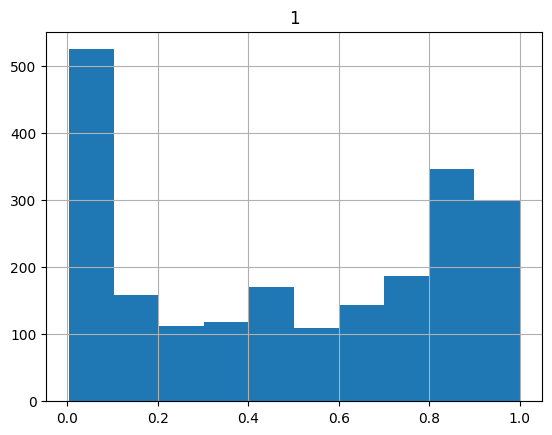

In [127]:
probs_lr.hist(column=1);

In [128]:
rfc.to_pickle('random_forest.pkl')

AttributeError: 'RandomForestClassifier' object has no attribute 'to_pickle'

In [145]:
import pickle

with open('rf_model.pickle', 'wb') as f:
    pickle.dump(rfc, f)

In [9]:
with open('rf_model.pickle', 'rb') as f:
    rf = pickle.load(f)


NameError: name 'pickle' is not defined

In [147]:
probs_lr = pd.DataFrame(rf.predict_proba(X_test))

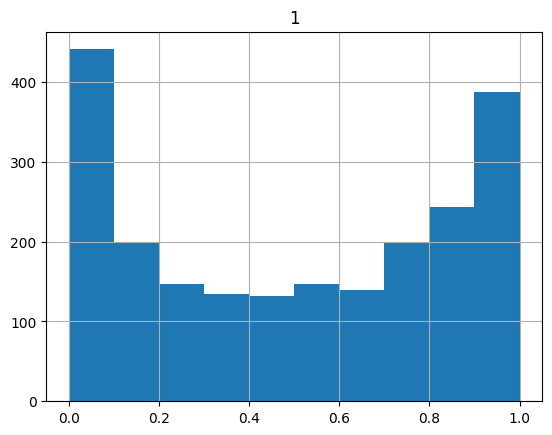

In [148]:
probs_lr.hist(column=1);

In [155]:
rfc.predict(X_train).sum()/len(rfc.predict(X_train))

0.5006918363312908

In [154]:
y_train.y.mean()

0.500098833761613